# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import skew
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
import matplotlib.style as style
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Loading the Dataset

In [2]:
card_data = pd.read_json('transactions/transactions.txt', lines=True)

In [3]:
card_data

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,,0.00,,,,False,,,False,False
1,737265056,737265056,5000,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,,0.00,,,,True,,,False,False
2,737265056,737265056,5000,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,,0.00,,,,False,,,False,False
3,737265056,737265056,5000,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,,0.00,,,,False,,,False,False
4,830329091,830329091,5000,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,,0.00,,,,True,,,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90,...,,1095.04,,,,False,,,False,False
786359,732852505,732852505,50000,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,09,...,,1214.96,,,,False,,,False,False
786360,732852505,732852505,50000,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,02,...,,1233.85,,,,False,,,False,False
786361,732852505,732852505,50000,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,09,...,,1283.28,,,,False,,,False,False


# Gathering basic information about the Dataset

In [4]:
print("Number of Records:" + str(card_data.shape[0]))
print("Number of Fields:" + str(card_data.shape[1]))

Number of Records:786363
Number of Fields:29


In [5]:
card_data.describe()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,currentBalance
count,7.863630e+05,7.863630e+05,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000
mean,5.372326e+08,5.372326e+08,10759.464459,6250.725369,136.985791,544.467338,544.183857,4757.417799,4508.739089
std,2.554211e+08,2.554211e+08,11636.174890,8880.783989,147.725569,261.524220,261.551254,2996.583810,6457.442068
min,1.000881e+08,1.000881e+08,250.000000,-1005.630000,0.000000,100.000000,0.000000,0.000000,0.000000
25%,3.301333e+08,3.301333e+08,5000.000000,1077.420000,33.650000,310.000000,310.000000,2178.000000,689.910000
50%,5.074561e+08,5.074561e+08,7500.000000,3184.860000,87.900000,535.000000,535.000000,4733.000000,2451.760000
75%,7.676200e+08,7.676200e+08,15000.000000,7500.000000,191.480000,785.000000,785.000000,7338.000000,5291.095000
max,9.993896e+08,9.993896e+08,50000.000000,50000.000000,2011.540000,998.000000,998.000000,9998.000000,47498.810000


In [6]:
card_data.replace('', np.nan, inplace=True)

In [7]:
card_data

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
1,737265056,737265056,5000,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,NaN,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False
2,737265056,737265056,5000,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
3,737265056,737265056,5000,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
4,830329091,830329091,5000,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,NaN,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90,...,NaN,1095.04,NaN,NaN,NaN,False,NaN,NaN,False,False
786359,732852505,732852505,50000,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,09,...,NaN,1214.96,NaN,NaN,NaN,False,NaN,NaN,False,False
786360,732852505,732852505,50000,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,02,...,NaN,1233.85,NaN,NaN,NaN,False,NaN,NaN,False,False
786361,732852505,732852505,50000,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,09,...,NaN,1283.28,NaN,NaN,NaN,False,NaN,NaN,False,False


In [8]:
card_data.isnull().sum()

accountNumber                    0
customerId                       0
creditLimit                      0
availableMoney                   0
transactionDateTime              0
transactionAmount                0
merchantName                     0
acqCountry                    4562
merchantCountryCode            724
posEntryMode                  4054
posConditionCode               409
merchantCategoryCode             0
currentExpDate                   0
accountOpenDate                  0
dateOfLastAddressChange          0
cardCVV                          0
enteredCVV                       0
cardLast4Digits                  0
transactionType                698
echoBuffer                  786363
currentBalance                   0
merchantCity                786363
merchantState               786363
merchantZip                 786363
cardPresent                      0
posOnPremises               786363
recurringAuthInd            786363
expirationDateKeyInMatch         0
isFraud             

### Getting unique values from each columns

In [9]:
for i in card_data.columns:
    print(i)
    print(card_data[i].unique())
    print('')

accountNumber
[737265056 830329091 574788567 ... 899818521 638498773 732852505]

customerId
[737265056 830329091 574788567 ... 899818521 638498773 732852505]

creditLimit
[ 5000  2500 50000 15000 10000   250   500  1000  7500 20000]

availableMoney
[ 5000.    4990.63  4959.25 ... 48766.15 48716.72 48666.83]

transactionDateTime
['2016-08-13T14:27:32' '2016-10-11T05:05:54' '2016-11-08T09:18:39' ...
 '2016-12-27T15:46:24' '2016-12-29T00:30:55' '2016-12-30T20:10:29']

transactionAmount
[ 98.55  74.51   7.47 ... 482.13 451.71 624.07]

merchantName
['Uber' 'AMC #191138' 'Play Store' ... 'ATT #141119' 'EZ Wireless #200746'
 'Runners #747070']

acqCountry
['US' nan 'CAN' 'MEX' 'PR']

merchantCountryCode
['US' 'CAN' nan 'PR' 'MEX']

posEntryMode
['02' '09' '05' '80' '90' nan]

posConditionCode
['01' '08' '99' nan]

merchantCategoryCode
['rideshare' 'entertainment' 'mobileapps' 'fastfood' 'food_delivery'
 'auto' 'online_retail' 'gym' 'health' 'personal care' 'food' 'fuel'
 'online_subscriptions

['PURCHASE' 'ADDRESS_VERIFICATION' 'REVERSAL' nan]

echoBuffer
[nan]

currentBalance
[   0.      9.37   40.75 ... 1095.04 1214.96 1233.85]

merchantCity
[nan]

merchantState
[nan]

merchantZip
[nan]

cardPresent
[False  True]

posOnPremises
[nan]

recurringAuthInd
[nan]

expirationDateKeyInMatch
[False  True]

isFraud
[False  True]



### Getting the value counts from each column

In [10]:
for i in card_data.columns:
    print(card_data[i].value_counts())
    print('')

380680241    32850
882815134    13189
570884863    10867
246251253    10172
369308035     7229
             ...  
675656700        1
456500351        1
587921563        1
749645399        1
266636812        1
Name: accountNumber, Length: 5000, dtype: int64

380680241    32850
882815134    13189
570884863    10867
246251253    10172
369308035     7229
             ...  
675656700        1
456500351        1
587921563        1
749645399        1
266636812        1
Name: customerId, Length: 5000, dtype: int64

5000     201863
15000    139307
7500      97913
2500      75429
20000     68629
10000     56889
50000     48781
1000      36430
250       34025
500       27097
Name: creditLimit, dtype: int64

250.00      6015
5000.00     5400
15000.00    4254
7500.00     4069
500.00      2811
            ... 
3665.23        1
4089.80        1
4650.83        1
4652.82        1
48666.83       1
Name: availableMoney, Length: 521915, dtype: int64

2016-12-25T14:04:15    4
2016-05-28T14:24:41    4
2016-

### Getting the count of unique values in columns 

In [11]:
for i in card_data.columns:
    print(i)
    print(card_data[i].nunique())
    print('')

accountNumber
5000

customerId
5000

creditLimit
10

availableMoney
521915

transactionDateTime
776637

transactionAmount
66038

merchantName
2490

acqCountry
4

merchantCountryCode
4

posEntryMode
5

posConditionCode
3

merchantCategoryCode
19

currentExpDate
165

accountOpenDate
1820

dateOfLastAddressChange
2184

cardCVV
899

enteredCVV
976

cardLast4Digits
5245

transactionType
3

echoBuffer
0

currentBalance
487318

merchantCity
0

merchantState
0

merchantZip
0

cardPresent
2

posOnPremises
0

recurringAuthInd
0

expirationDateKeyInMatch
2

isFraud
2



### Maximum values in the dataset

In [12]:
card_data.max()

C:\Users\KSP200~1\AppData\Local\Temp/ipykernel_9384/338006527.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  card_data.max()


accountNumber                         999389635
customerId                            999389635
creditLimit                               50000
availableMoney                          50000.0
transactionDateTime         2016-12-30T23:59:45
transactionAmount                       2011.54
merchantName                 williamssonoma.com
merchantCategoryCode              subscriptions
currentExpDate                          12/2032
accountOpenDate                      2015-12-31
dateOfLastAddressChange              2016-12-30
cardCVV                                     998
enteredCVV                                  998
cardLast4Digits                            9998
echoBuffer                                  NaN
currentBalance                         47498.81
merchantCity                                NaN
merchantState                               NaN
merchantZip                                 NaN
cardPresent                                True
posOnPremises                           

### Minimum values in the dataset

In [13]:
card_data.min()

C:\Users\KSP200~1\AppData\Local\Temp/ipykernel_9384/345696561.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  card_data.min()


accountNumber                         100088067
customerId                            100088067
creditLimit                                 250
availableMoney                         -1005.63
transactionDateTime         2016-01-01T00:01:02
transactionAmount                           0.0
merchantName                            1st BBQ
merchantCategoryCode                    airline
currentExpDate                          01/2020
accountOpenDate                      1989-08-22
dateOfLastAddressChange              1989-08-22
cardCVV                                     100
enteredCVV                                    0
cardLast4Digits                               0
echoBuffer                                  NaN
currentBalance                              0.0
merchantCity                                NaN
merchantState                               NaN
merchantZip                                 NaN
cardPresent                               False
posOnPremises                           

In [14]:
card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  int64  
 1   customerId                786363 non-null  int64  
 2   creditLimit               786363 non-null  int64  
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                781801 non-null  object 
 8   merchantCountryCode       785639 non-null  object 
 9   posEntryMode              782309 non-null  object 
 10  posConditionCode          785954 non-null  object 
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

# Visualizations 

### Plot for transaction amount. We can see that maximum transactions range from 0 to 250 USD for this dataset. 

Text(0, 0.5, 'Counts')

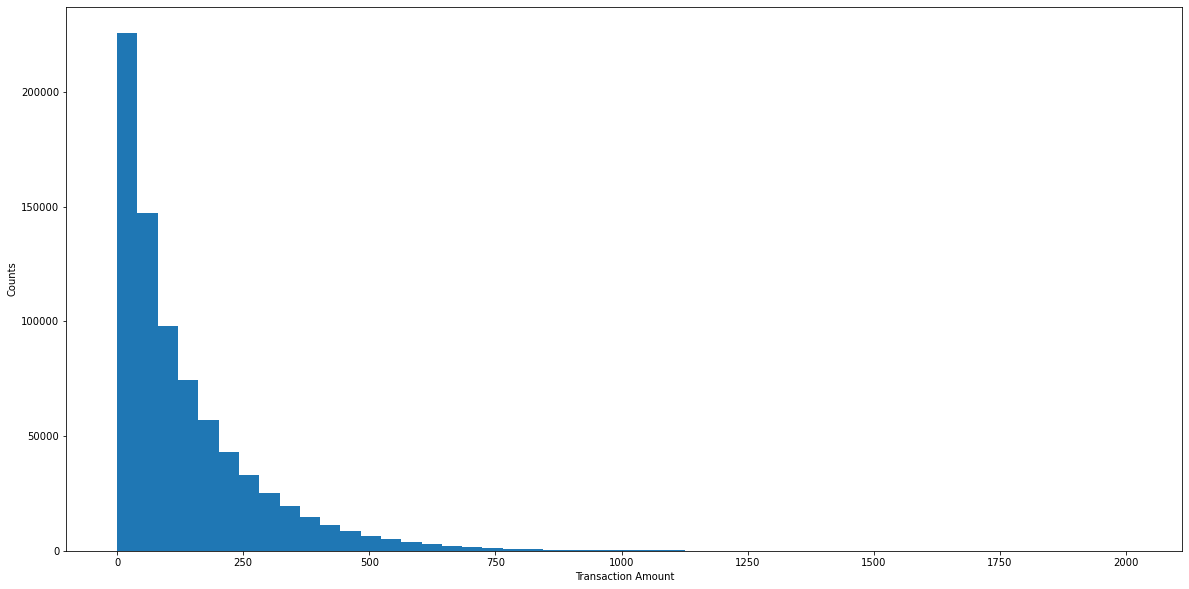

In [15]:
plt.figure(figsize=(20,10))
plt.hist(card_data['transactionAmount'], bins=50)
plt.xlabel('Transaction Amount')
plt.ylabel('Counts')

### Checking the Correlation among the columns in the dataset. We can see that some columns have null values and some are positively correlated.

<AxesSubplot:>

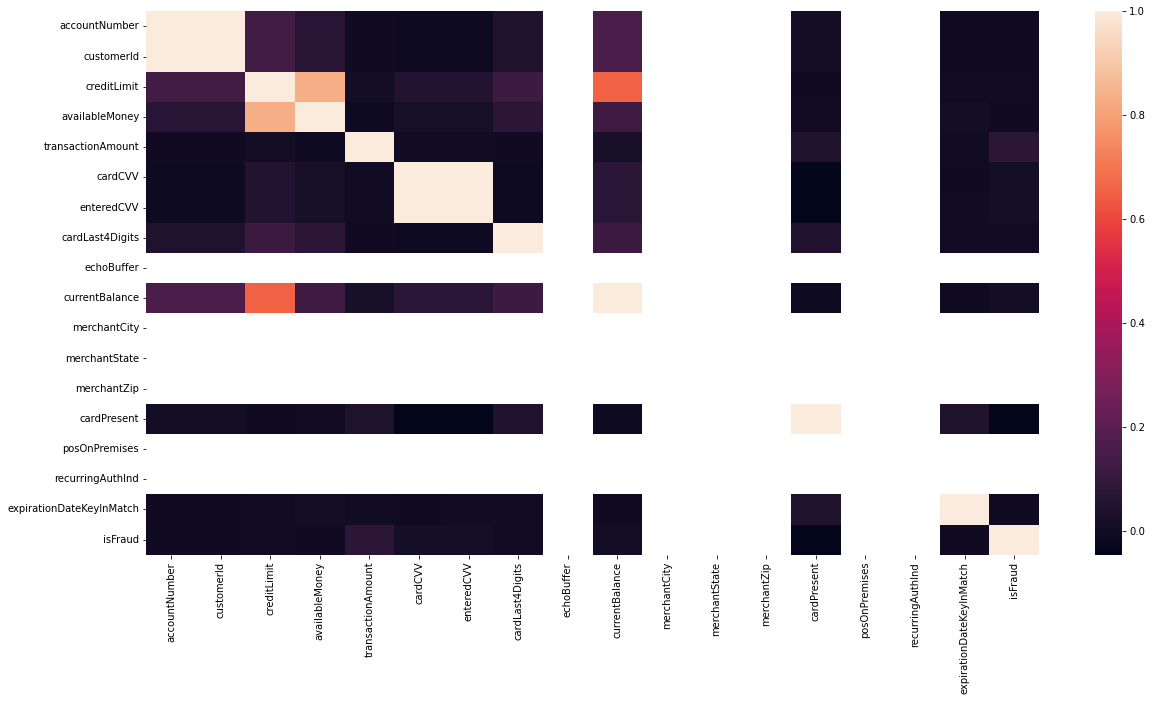

In [16]:
plt.figure(figsize=(20,10))
corr = card_data.corr()
sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns)

### Getting to know more about the Numerical data. These plots shows about the range of customer's credit limit, their balance and amount they are spending in accordance to their balance and limit.

Text(0.5, 1.0, 'Displot')

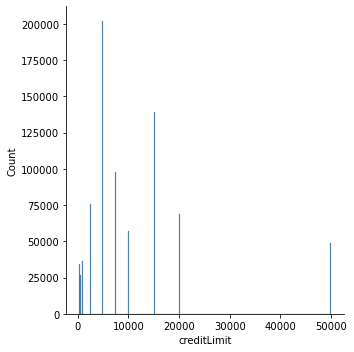

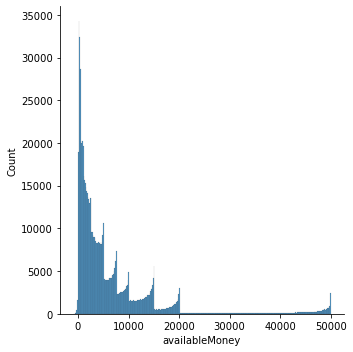

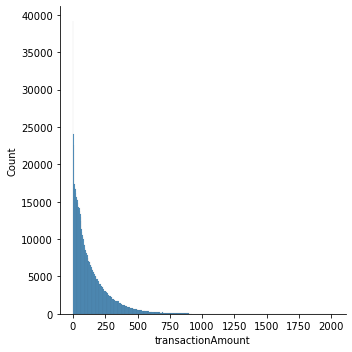

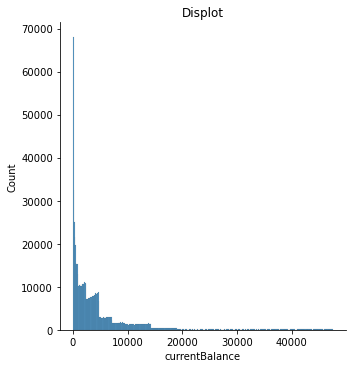

In [17]:
visual = ['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']
for i in visual:
    sns.displot(card_data[i])
plt.title('Displot')

### We can see that most of the data shows that there is no fraud but only few data reflects the fraud in the transactions.

Text(0, 0.5, 'Fraud Counts')

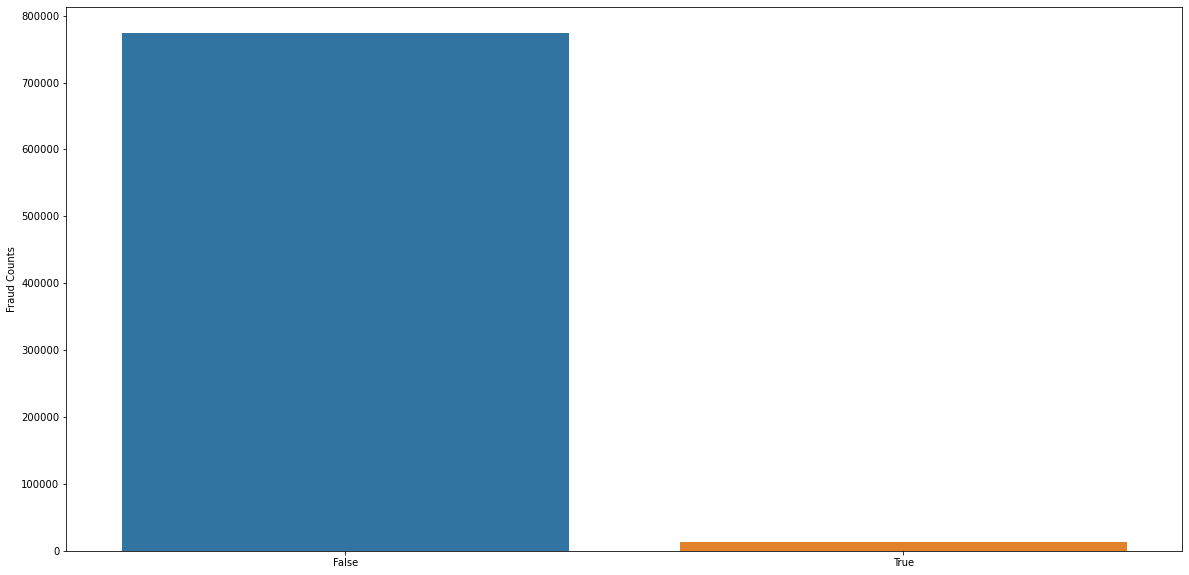

In [18]:
plt.figure(figsize=(20,10))
fraudcounts = card_data['isFraud'].value_counts()
sns.barplot(x=[False,True], y=fraudcounts)
plt.ylabel('Fraud Counts')

### Plot of transaction type with respect to transaction amount and checking the fraudness and estimating the central tendency of the data. Maximum fraud happens in the purchase and the reverse transaction type.

Text(0, 0.5, 'Transaction Type')

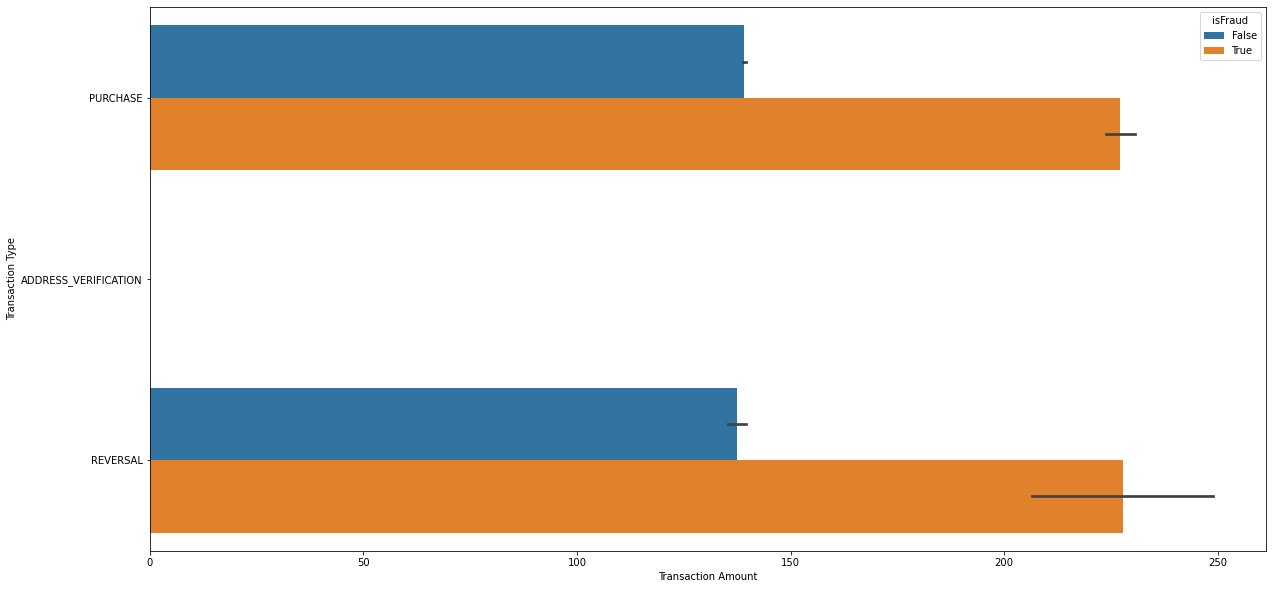

In [19]:
plt.figure(figsize=(20,10))
sns.barplot(data=card_data, x='transactionAmount', y='transactionType', hue='isFraud')
plt.xlabel('Transaction Amount')
plt.ylabel('Transaction Type')

### Getting to know about the relationship between transaction amount and current balance and also knowing about the fraudness. People having less balance, have more transactions.

Text(0, 0.5, 'Transaction Amount')

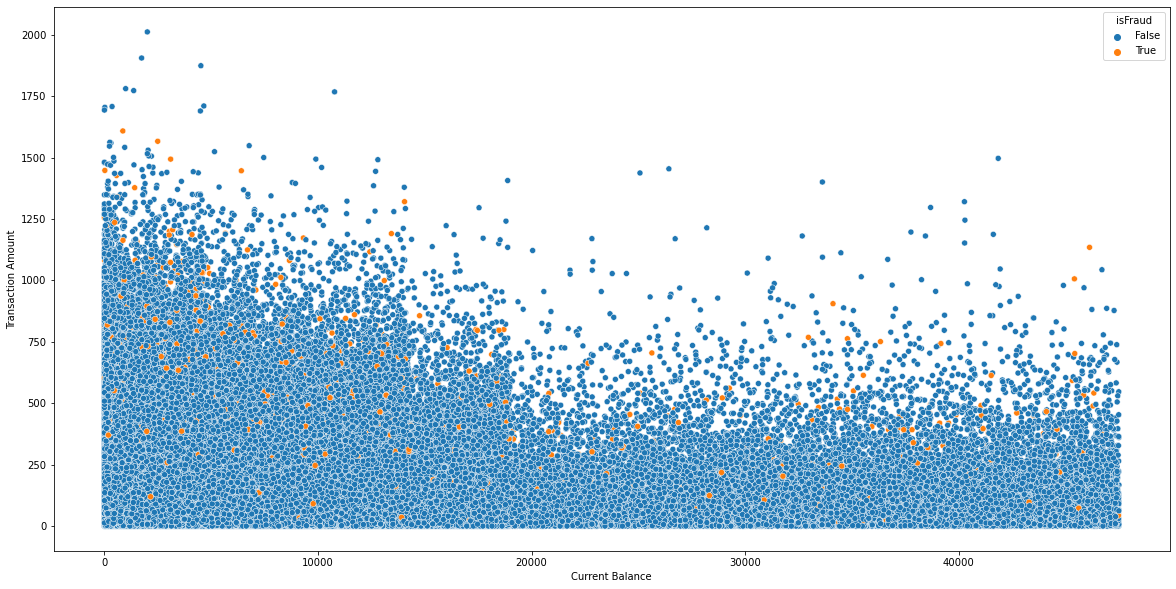

In [20]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=card_data, y='transactionAmount', x='currentBalance',hue='isFraud')
plt.xlabel('Current Balance')
plt.ylabel('Transaction Amount')

### Getting to know about the relationship between transaction amount and current balance and also knowing about the credit limit. According to the graph, we see that the people having more credit limit have more current balance in their accounts but they have less transaction amount.

Text(0, 0.5, 'Current Balance')

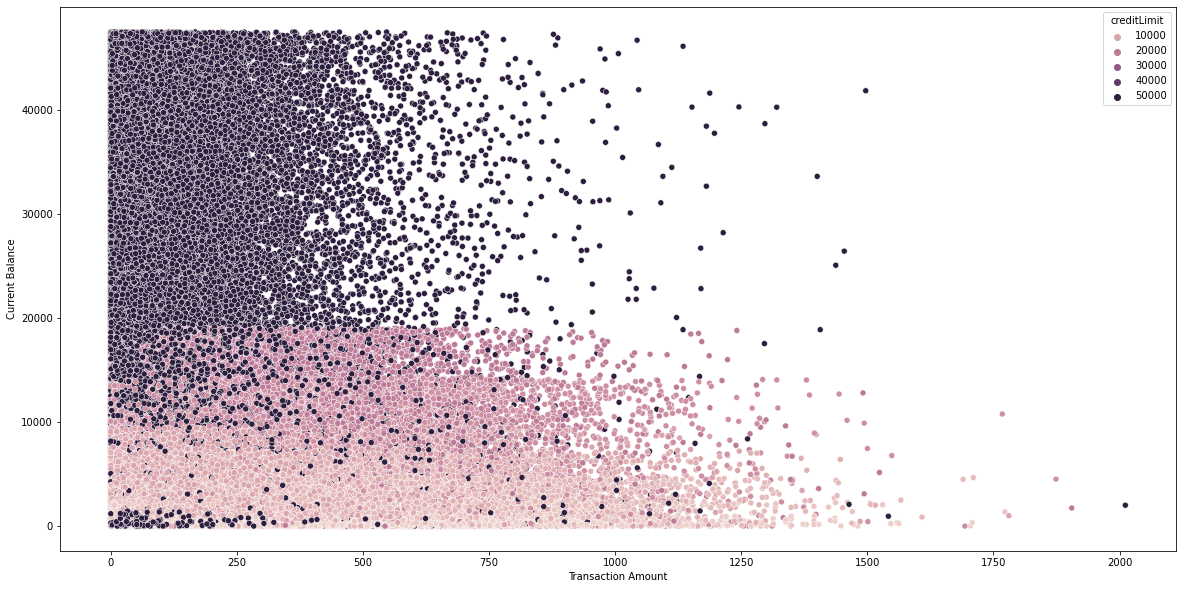

In [21]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=card_data, x='transactionAmount', y='currentBalance',hue='creditLimit')
plt.xlabel('Transaction Amount')
plt.ylabel('Current Balance')

### Relationship between transaction amount and available money and also knowing about the fraudness. People having less money in their accounts, tend to spend more. Looking closer, there are also some frauds noted in that particular area of the plot.

Text(0, 0.5, 'Transaction Amount')

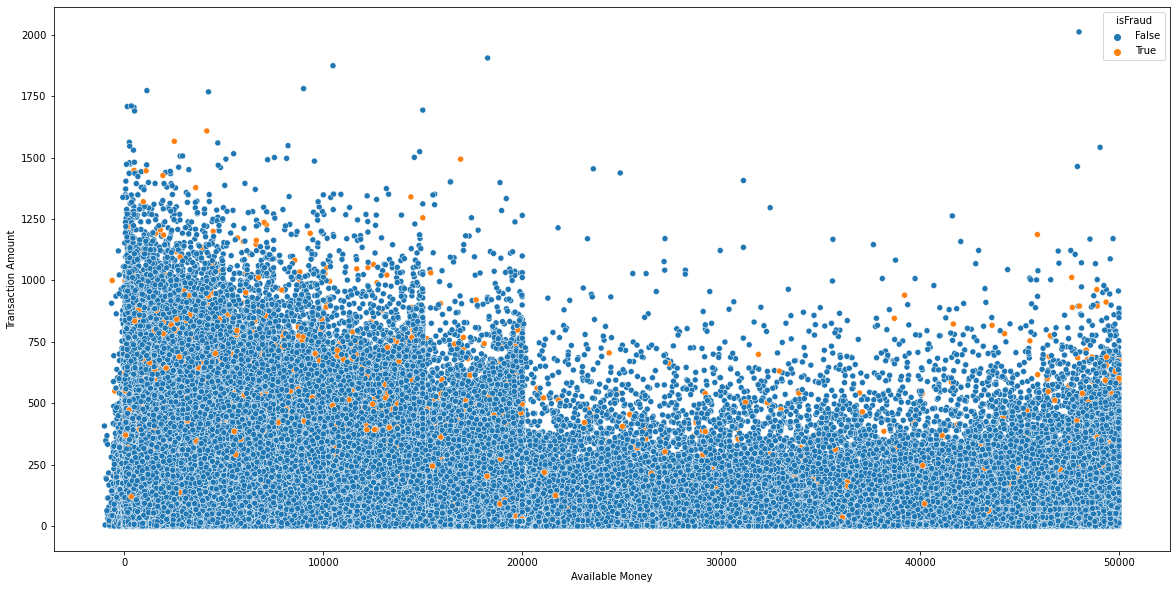

In [22]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=card_data, x='availableMoney', y='transactionAmount',hue='isFraud')
plt.xlabel('Available Money')
plt.ylabel('Transaction Amount')

### Checking, how much fraud is caused whether the card is present or not.  

Text(0, 0.5, 'Transactions')

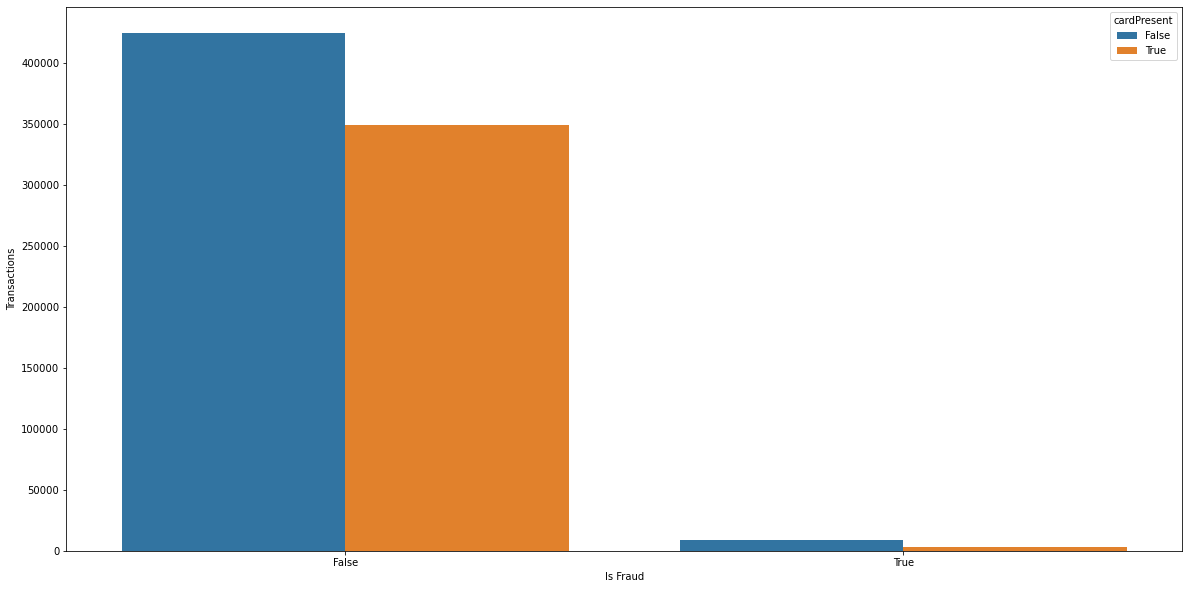

In [23]:
plt.figure(figsize=(20,10))
sns.countplot(data=card_data, x='isFraud', hue='cardPresent')
plt.xlabel('Is Fraud')
plt.ylabel('Transactions')

### Getting country wise data about the transaction amount and checking the data points for fraud present or not.

Text(30.54895833333333, 0.5, 'Transaction Amount')

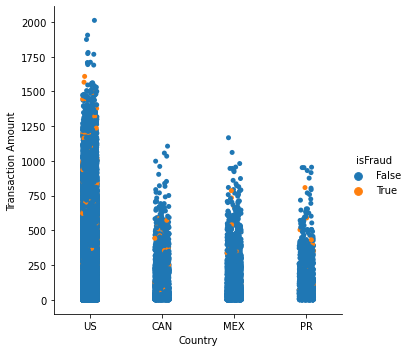

In [24]:
sns.catplot(x="acqCountry", y="transactionAmount", hue="isFraud", data=card_data)
plt.xlabel('Country')
plt.ylabel('Transaction Amount')

### Getting the merchant category data and checking te amount of transactions on that data. Also, cheking the fraudness in the each merchant category data. Categories like fuel, online_subscriptions, gym, etc have very less transaction amount. And categories like online_retail, online_gifts, etc have more transaction amount. 

Text(43.543315972222246, 0.5, 'Merchant Category')

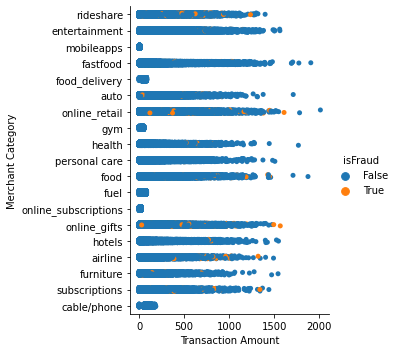

In [25]:
sns.catplot(y="merchantCategoryCode", x="transactionAmount", hue="isFraud", data=card_data)
plt.xlabel('Transaction Amount')
plt.ylabel('Merchant Category')

### Checking the impact of expiration date key match on the fraudness of the data. We see that very less transactions are such like that.

Text(0, 0.5, 'Transactions')

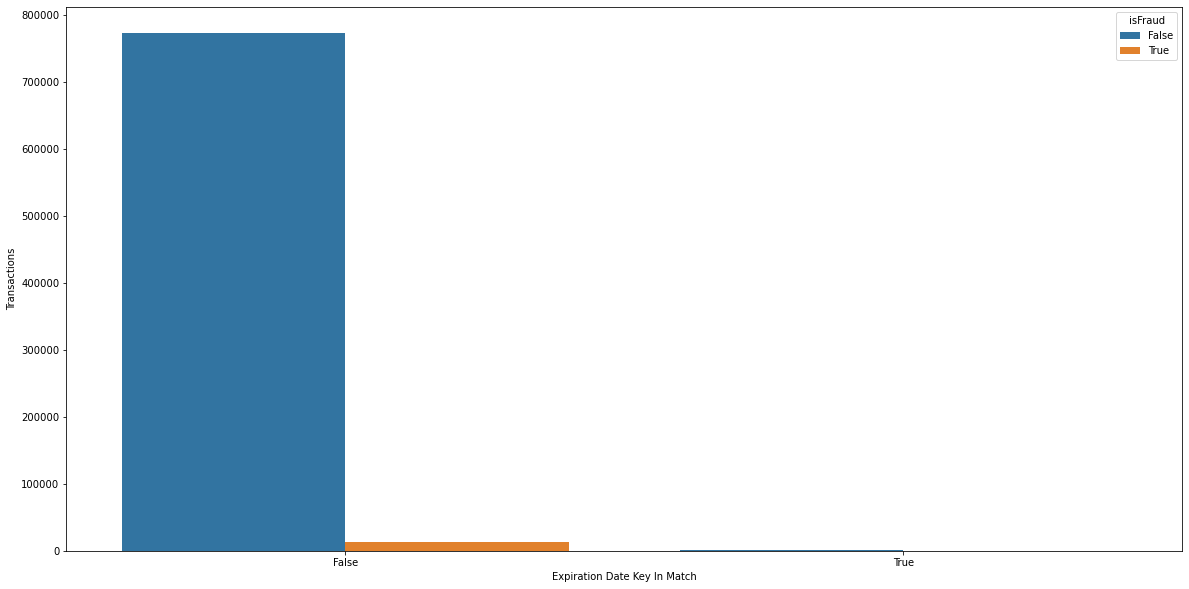

In [26]:
plt.figure(figsize=(20,10))
sns.countplot(data=card_data, x='expirationDateKeyInMatch', hue='isFraud')
plt.xlabel('Expiration Date Key In Match')
plt.ylabel('Transactions')

### Checking different pos entry mode with respect to the transactions and also knowing about the fraudness.

Text(0, 0.5, 'Transactions')

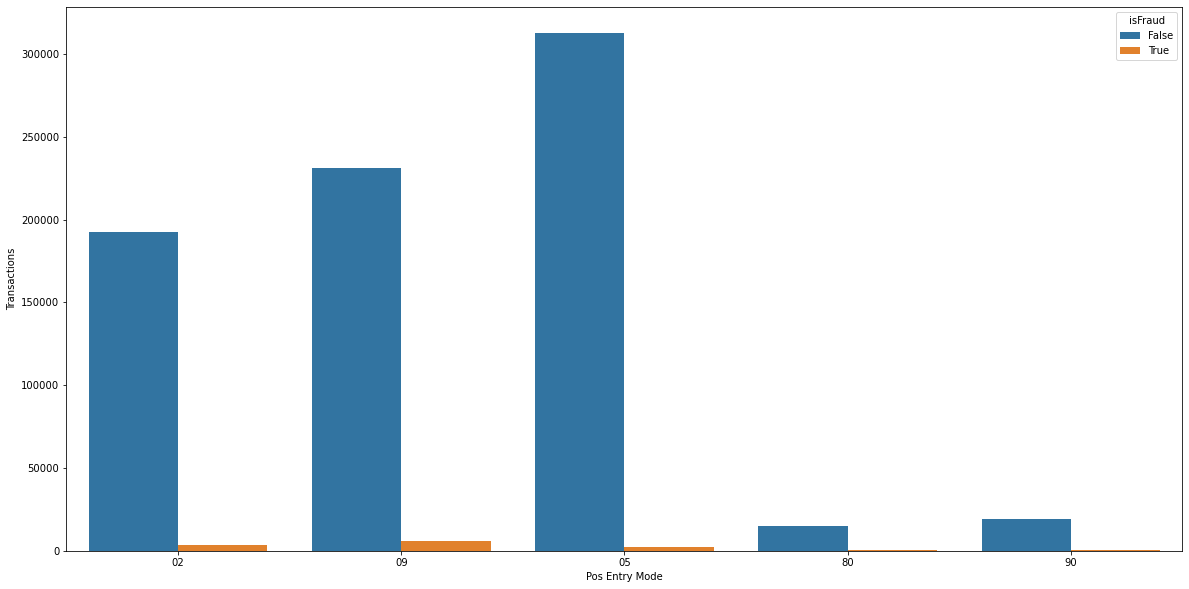

In [27]:
plt.figure(figsize=(20,10))
sns.countplot(data=card_data, x='posEntryMode', hue='isFraud')
plt.xlabel('Pos Entry Mode')
plt.ylabel('Transactions')

### Checking different pos condition mode with respect to the transactions and also knowing about the fraudness.

Text(0, 0.5, 'Transactions')

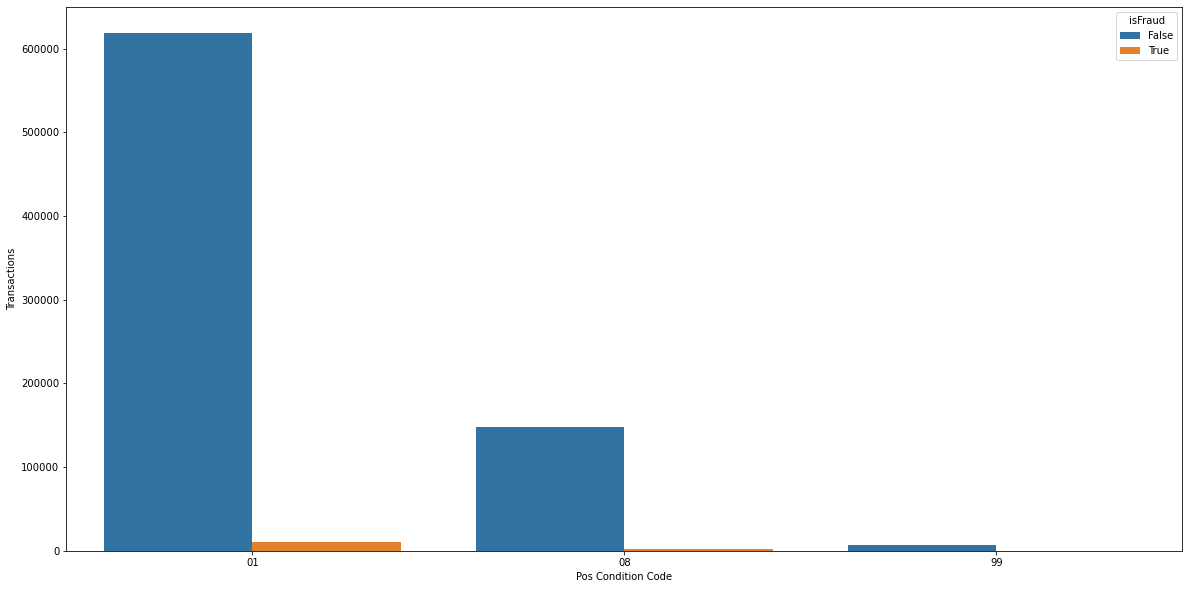

In [28]:
plt.figure(figsize=(20,10))
sns.countplot(data=card_data, x='posConditionCode', hue='isFraud')
plt.xlabel('Pos Condition Code')
plt.ylabel('Transactions')

### Checking the distribution of the data by boxplot. We can observe that there is no normal distribution and the data is mostly right skewed and the plots have far outliers. Interesting to know that available money is less but also the people are spending less and we can confirm that by looking at the transaction amount plot.

C:\Users\ksp200004\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ksp200004\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ksp200004\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ksp200004\

Text(0.5, 1.0, 'Boxplot')

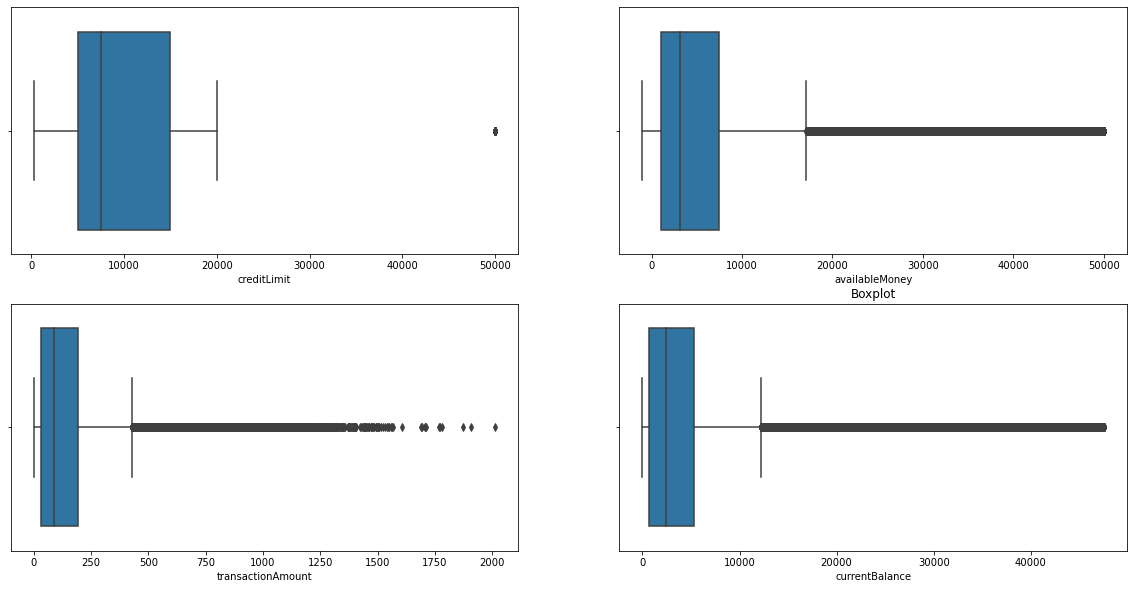

In [29]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
c = 0
for i in range(2):
    for j in range(2):
        sns.boxplot(card_data[visual[c]], ax=ax[i][j])
        c+=1
plt.title('Boxplot')

In [30]:
card_data['country'] = card_data['acqCountry'] == card_data['merchantCountryCode']
card_data['CVV'] = card_data['cardCVV'] == card_data['enteredCVV']

### Getting to know about the farudness due to the natching of CVV number.

<AxesSubplot:xlabel='CVV', ylabel='count'>

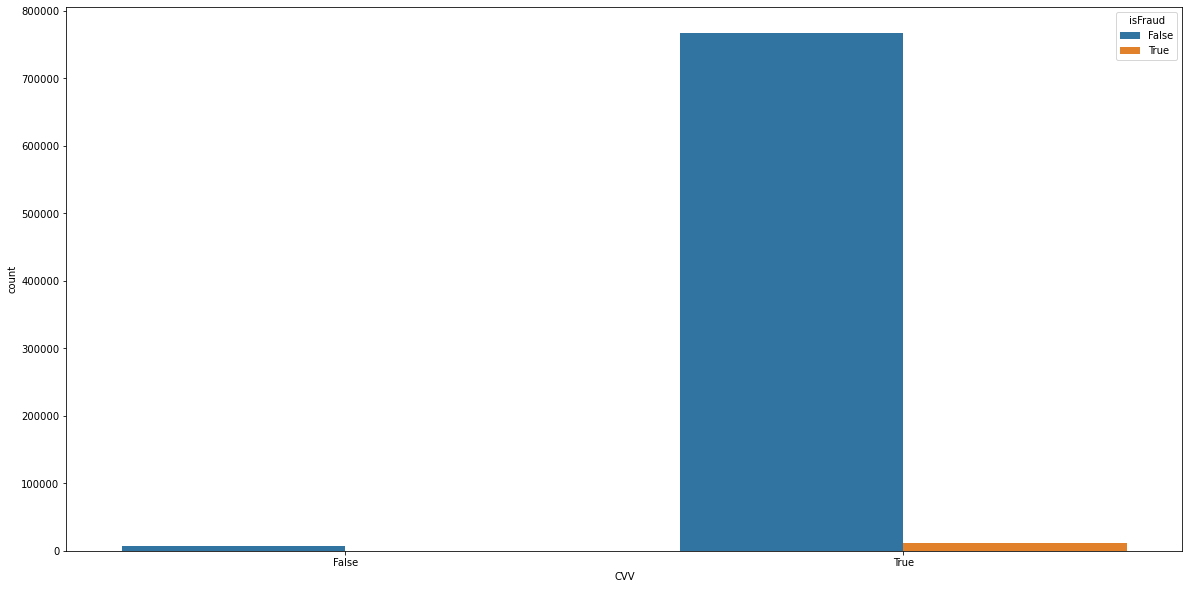

In [31]:
plt.figure(figsize=(20,10))
sns.countplot(data=card_data, x='CVV', hue='isFraud')

# Data Wrangling

In [32]:
card_data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
786358    False
786359    False
786360    False
786361    False
786362    False
Length: 786363, dtype: bool

In [33]:
card_data.duplicated().sum()

0

### Reverse Transactions

In [34]:
transaction_type_reverse = card_data[card_data['transactionType'] == 'REVERSAL']
print('Number of Reversal type Transactions ', transaction_type_reverse['transactionType'].value_counts())
print('Reversal Type Transaction Amount: $', transaction_type_reverse['transactionAmount'].sum())

Number of Reversal type Transactions  REVERSAL    20303
Name: transactionType, dtype: int64
Reversal Type Transaction Amount: $ 2821792.5


### Multiswipe Transactions

In [35]:
multiswipe = card_data['accountNumber']
multiswipe = pd.concat([multiswipe, card_data['transactionDateTime']], axis='columns')
multiswipe = pd.concat([multiswipe, card_data['transactionAmount']], axis='columns')
multiswipe['transactionDateTime'] = pd.to_datetime(multiswipe['transactionDateTime']).dt.minute

m_diff = multiswipe['transactionDateTime'].diff()
multiswipe = pd.concat([multiswipe, abs(m_diff)], axis='columns')
multiswipe.columns = ['accountNumber', 'transactionDateTime', 'transactionAmount', 'minutes']

t_1 = multiswipe[multiswipe['minutes'] <= 1.0]
print('Multiswipe Transactions under 1 minute: ', t_1['accountNumber'].nunique())
print('Multiswipe Transaction Amount under 1 minute: $', t_1['transactionAmount'].sum())
print('')

t_2 = multiswipe[multiswipe['minutes'] <= 2.0]
print('Multiswipe Transactions under 2 minutes: ', t_2['accountNumber'].nunique())
print('Multiswipe Transaction Amount under 2 minutes: $', t_2['transactionAmount'].sum())

Multiswipe Transactions under 1 minute:  4081
Multiswipe Transaction Amount under 1 minute: $ 6512621.23

Multiswipe Transactions under 2 minutes:  4466
Multiswipe Transaction Amount under 2 minutes: $ 10785366.45


### We observe that there is more transaction amount in multiswipe rather than the reverse one. It's interesting to know that frauds happen more by the vendors by this multiswipe method.

In [36]:
new_data = card_data
new_data.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud,country,CVV
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,NaN,NaN,NaN,False,NaN,NaN,False,False,True,True
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,NaN,NaN,NaN,True,NaN,NaN,False,False,True,True
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,NaN,NaN,NaN,False,NaN,NaN,False,False,True,True
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,NaN,NaN,NaN,False,NaN,NaN,False,False,True,True
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,NaN,NaN,NaN,True,NaN,NaN,False,False,True,True


In [37]:
new_data.drop(['echoBuffer', 'cardLast4Digits', 'merchantName', 'accountOpenDate', 'transactionDateTime', 'currentExpDate', 'customerId', 'dateOfLastAddressChange', 'accountNumber', 'enteredCVV', 'cardCVV', 'merchantCity', 'merchantState', 'merchantZip', 'posOnPremises', 'recurringAuthInd', 'acqCountry', 'merchantCountryCode',], inplace=True, axis=1)

In [38]:
card_data = card_data.dropna(axis=0)
card_data.isnull().sum()

creditLimit                 0
availableMoney              0
transactionAmount           0
posEntryMode                0
posConditionCode            0
merchantCategoryCode        0
transactionType             0
currentBalance              0
cardPresent                 0
expirationDateKeyInMatch    0
isFraud                     0
country                     0
CVV                         0
dtype: int64

In [39]:
new_data.head()

,creditLimit,availableMoney,transactionAmount,posEntryMode,posConditionCode,merchantCategoryCode,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,country,CVV
0,5000,5000.0,98.55,02,01,rideshare,PURCHASE,0.0,False,False,False,True,True
1,5000,5000.0,74.51,09,01,entertainment,PURCHASE,0.0,True,False,False,True,True
2,5000,5000.0,7.47,09,01,mobileapps,PURCHASE,0.0,False,False,False,True,True
3,5000,5000.0,7.47,09,01,mobileapps,PURCHASE,0.0,False,False,False,True,True
4,5000,5000.0,71.18,02,01,fastfood,PURCHASE,0.0,True,False,False,True,True


In [40]:
le = preprocessing.LabelEncoder()
arr = ['cardPresent', 'expirationDateKeyInMatch', 'isFraud', 'country', 'CVV']

for i in arr:
    new_data[i] = le.fit_transform(new_data[i])

dummy_1 = pd.get_dummies(new_data['posEntryMode']) 
dummy_2 = pd.get_dummies(new_data['posConditionCode']) 
dummy_3 = pd.get_dummies(new_data['merchantCategoryCode']) 
dummy_4 = pd.get_dummies(new_data['transactionType']) 

dummy_1.drop(['90',], inplace=True, axis=1)
dummy_2.drop(['99',], inplace=True, axis=1)
dummy_3.drop(['cable/phone',], inplace=True, axis=1)
dummy_4.drop(['REVERSAL',], inplace=True, axis=1)

new_data = pd.concat([new_data, dummy_1], axis='columns')
new_data = pd.concat([new_data, dummy_2], axis='columns')
new_data = pd.concat([new_data, dummy_3], axis='columns')
new_data = pd.concat([new_data, dummy_4], axis='columns')

new_data.drop(['posEntryMode', 'posConditionCode', 'merchantCategoryCode', 'transactionType'], inplace=True, axis=1)

new_data

,creditLimit,availableMoney,transactionAmount,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,country,CVV,02,...,hotels,mobileapps,online_gifts,online_retail,online_subscriptions,personal care,rideshare,subscriptions,ADDRESS_VERIFICATION,PURCHASE
0,5000,5000.00,98.55,0.00,0,0,0,1,1,1,...,0,0,0,0,0,0,1,0,0,1
1,5000,5000.00,74.51,0.00,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
2,5000,5000.00,7.47,0.00,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,5000,5000.00,7.47,0.00,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
4,5000,5000.00,71.18,0.00,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,50000,48904.96,119.92,1095.04,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,1
786359,50000,48785.04,18.89,1214.96,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,1
786360,50000,48766.15,49.43,1233.85,0,0,0,1,1,1,...,0,0,0,0,0,0,1,0,0,1
786361,50000,48716.72,49.89,1283.28,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1


In [41]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 35 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   creditLimit               786363 non-null  int64  
 1   availableMoney            786363 non-null  float64
 2   transactionAmount         786363 non-null  float64
 3   currentBalance            786363 non-null  float64
 4   cardPresent               786363 non-null  int64  
 5   expirationDateKeyInMatch  786363 non-null  int64  
 6   isFraud                   786363 non-null  int64  
 7   country                   786363 non-null  int64  
 8   CVV                       786363 non-null  int64  
 9   02                        786363 non-null  uint8  
 10  05                        786363 non-null  uint8  
 11  09                        786363 non-null  uint8  
 12  80                        786363 non-null  uint8  
 13  01                        786363 non-null  u

### Checking for skewness in entire dataset and knowing about the structure of dataset. Quiet interesting that the data is right skewed and we can get a normal distribution by performing Standardisation.

creditLimit
2.280307813431982


C:\Users\ksp200004\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 1440x720 with 0 Axes>

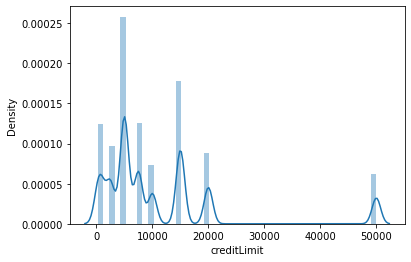

availableMoney
2.999317874124741


C:\Users\ksp200004\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


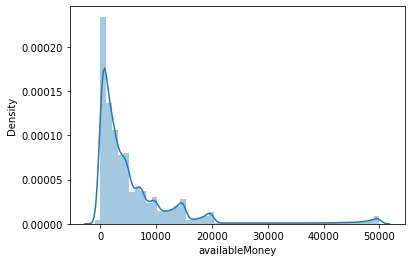

transactionAmount
2.0922422738206343


C:\Users\ksp200004\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


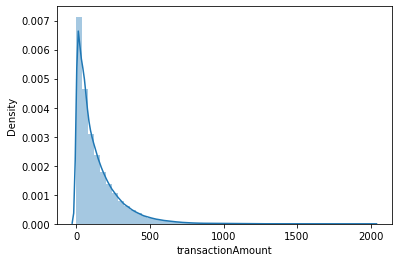

currentBalance
3.3621302945981197


C:\Users\ksp200004\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


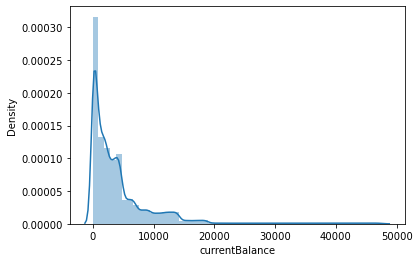

cardPresent
0.20614951454054184


C:\Users\ksp200004\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


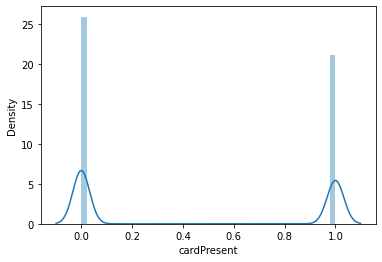

expirationDateKeyInMatch
27.403371335066403


C:\Users\ksp200004\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


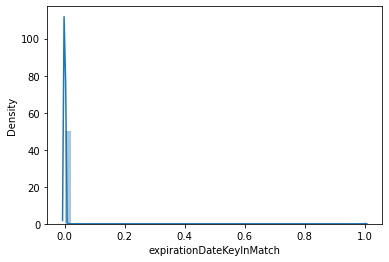

isFraud
7.768242526790665


C:\Users\ksp200004\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


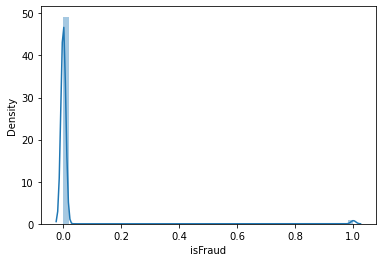

country
-12.914078068469932


C:\Users\ksp200004\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


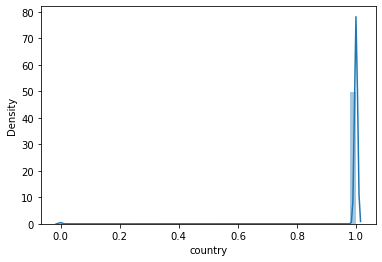

CVV
-10.445399174170609


C:\Users\ksp200004\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


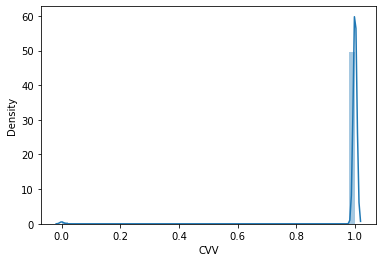

02
1.1598524936190278


C:\Users\ksp200004\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


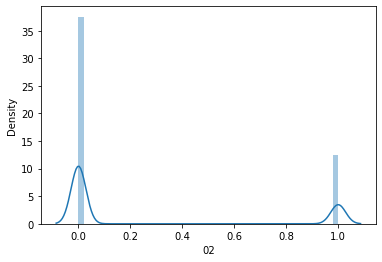

05
0.40560052096325744


C:\Users\ksp200004\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


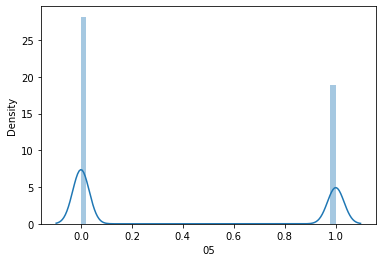

09
0.8690954964831814


C:\Users\ksp200004\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


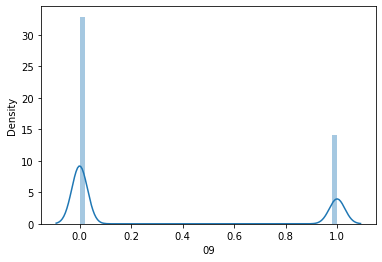

80
6.962274431273657


C:\Users\ksp200004\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


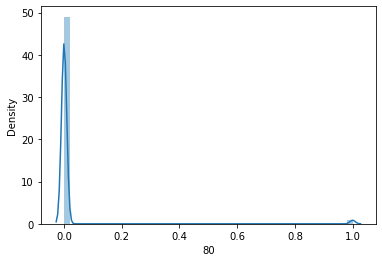

01
-1.496988992894595


C:\Users\ksp200004\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


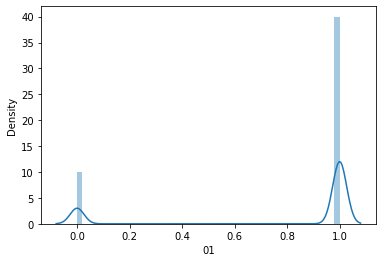

08
1.5780516497498167


C:\Users\ksp200004\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


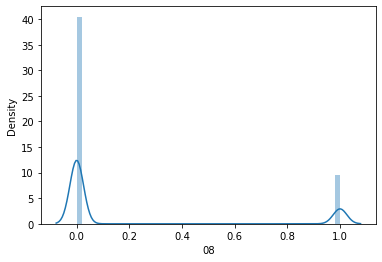

airline
6.931288866857408


C:\Users\ksp200004\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


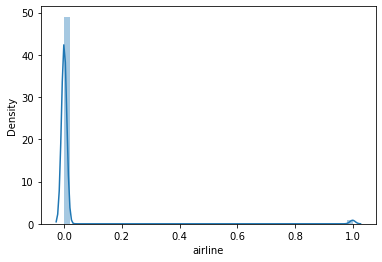

auto
5.77479451171139


C:\Users\ksp200004\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


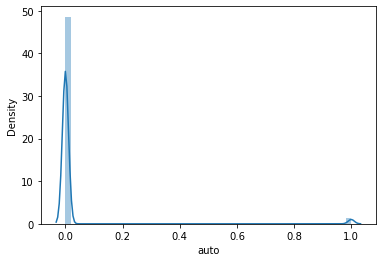

entertainment
2.632664379974698


C:\Users\ksp200004\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


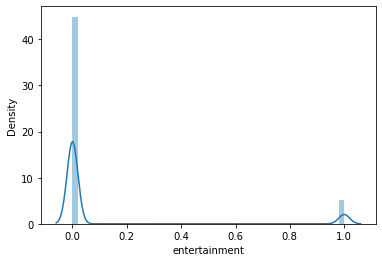

fastfood
2.044206250923972


C:\Users\ksp200004\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


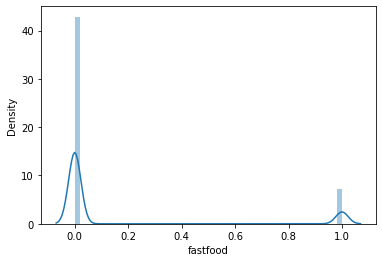

food
2.7428045957822196


C:\Users\ksp200004\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


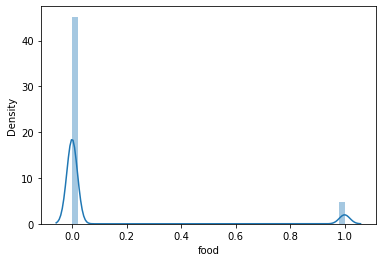

food_delivery
11.316721642307733


C:\Users\ksp200004\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


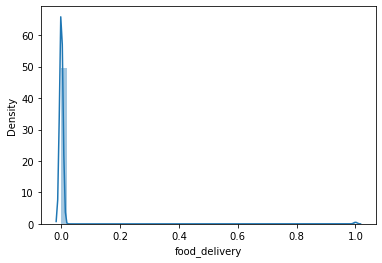

fuel
5.469900915253314


C:\Users\ksp200004\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


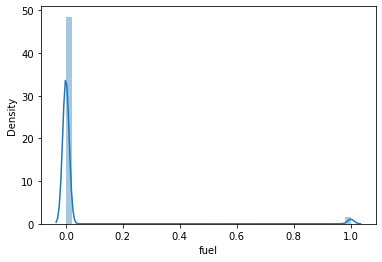

furniture
10.13988484352888


C:\Users\ksp200004\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


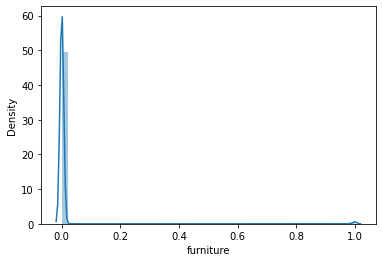

gym
18.7878752554435


C:\Users\ksp200004\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


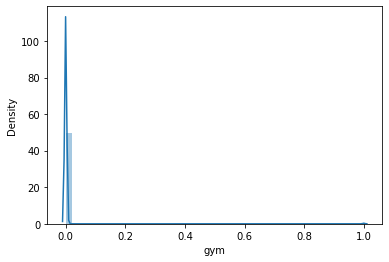

health
6.181664197159823


C:\Users\ksp200004\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


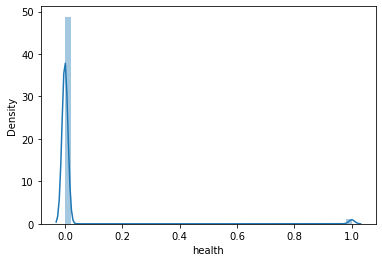

hotels
4.48417809834063


C:\Users\ksp200004\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


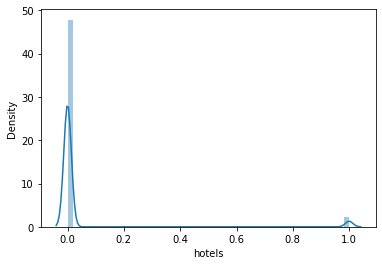

mobileapps
7.034103046104973


C:\Users\ksp200004\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


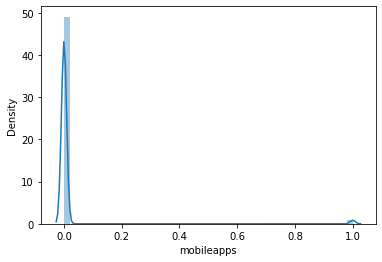

online_gifts
2.99395420843143


C:\Users\ksp200004\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


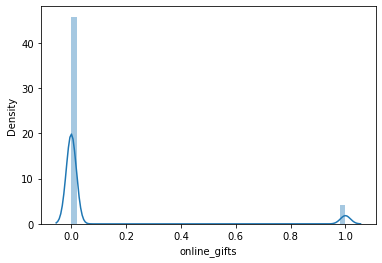

online_retail
1.1117180185386493


C:\Users\ksp200004\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


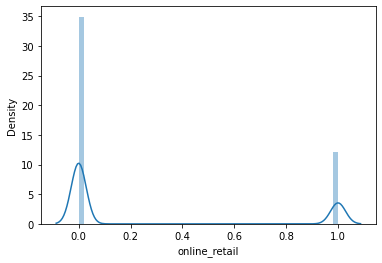

online_subscriptions
8.250395865343028


C:\Users\ksp200004\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


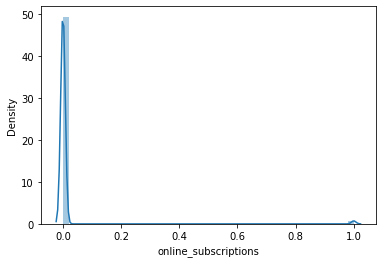

personal care
6.204095880781138


C:\Users\ksp200004\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


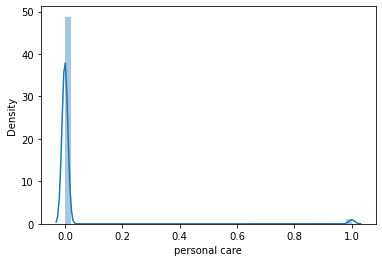

rideshare
3.528090984619352


C:\Users\ksp200004\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


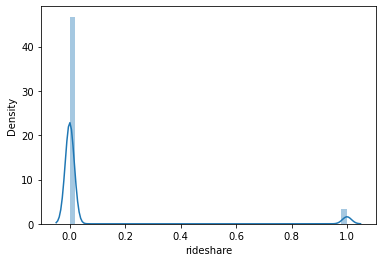

subscriptions
5.600668927290089


C:\Users\ksp200004\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


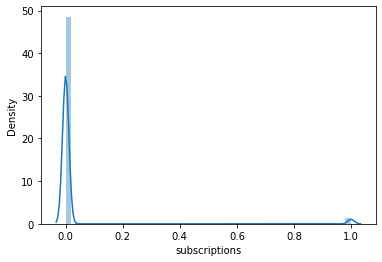

ADDRESS_VERIFICATION
6.001251464754715


C:\Users\ksp200004\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


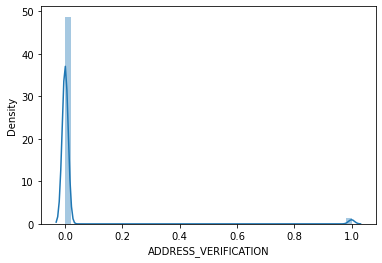

PURCHASE
-4.019407427102122


C:\Users\ksp200004\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


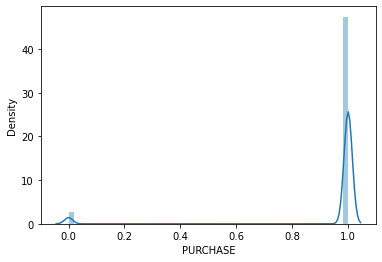

In [42]:
plt.figure(figsize=(20,10))
for i in new_data:
    print(i)
    print(skew(new_data[i]))
    plt.figure()
    sns.distplot(new_data[i])
    plt.show()

In [43]:
Y = new_data['isFraud']
new_data.drop('isFraud', inplace=True, axis=1)
X = new_data

C:\Users\ksp200004\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Before Standardisation')

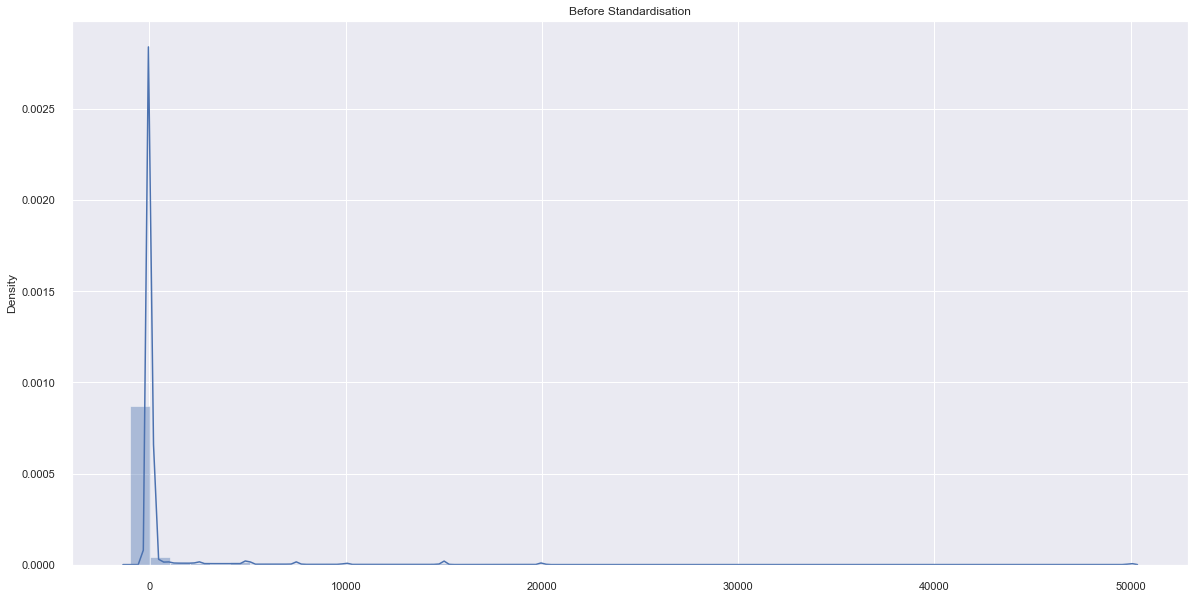

In [44]:
plt.figure(figsize=(20,10))
style.available
style.use('seaborn-poster')
style.use('ggplot')
sns.set(color_codes=True)
sns.distplot(X);
plt.title('Before Standardisation')

In [45]:
scaler = StandardScaler().fit(X)
st_X = scaler.transform(X)

C:\Users\ksp200004\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'After Standardisation')

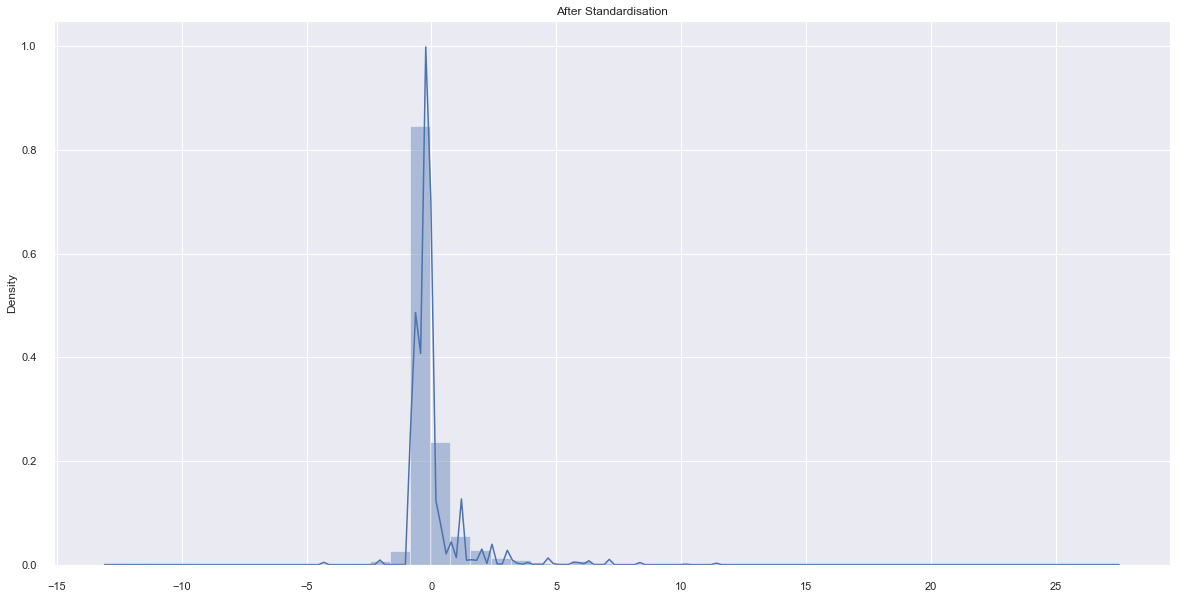

In [46]:
plt.figure(figsize=(20,10))
import matplotlib.style as style
style.available
style.use('seaborn-poster')
style.use('ggplot')
sns.set(color_codes=True)
sns.distplot(st_X);
plt.title('After Standardisation')

In [47]:
sampling = RandomUnderSampler()
x_new, y_new = sampling.fit_resample(st_X, Y)
print('After Random Under Sampling: ',x_new.shape)

After Random Under Sampling:  (24834, 34)


In [48]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.33, random_state=42)

# Models

### Looking at the classification column 'isFraud', we can implement a binary classifier for such problem. My methodolgy would be to test different binary classifier algorithm and checking the accuracy for each algorithm. Also, I would be looking at the confusion matrix of each algorithm to understand more about the classification. We would select the the model giving us the best accuracy for this dataset and also satisfying our requirements. Here I used the Random Under Sampler to reduce the data and get it into proper distribution and so we might get less accuracy and also the computation would be less. If we supply full dataset, the model takes some time and also it gives us better accuracy around 97%-98% but due to less data provided to the models, we get less accuracy. Our ultimate goal was to choose the best algorithm among all, that gives us the best results and so I below performed each model with accuracy and confusion matrix.

Logistic Regression Accuracy:  0.6772816007808687



<AxesSubplot:>

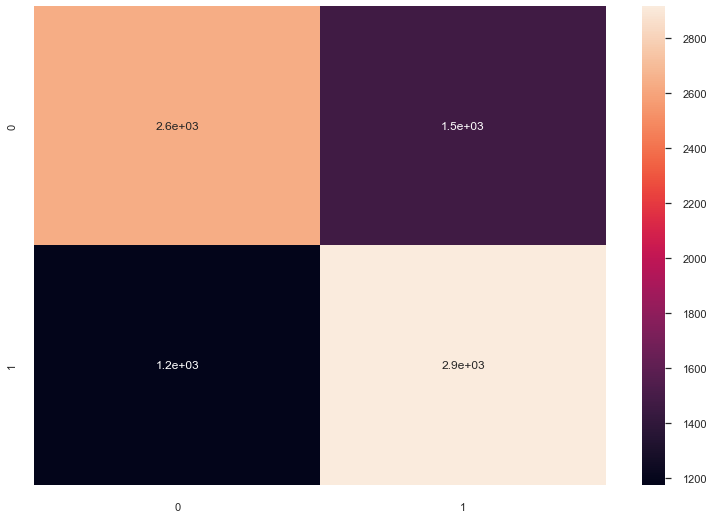

In [49]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
predicted_classes = lr.predict(x_test)
accuracy = accuracy_score(y_test,predicted_classes)
print('Logistic Regression Accuracy: ',accuracy)
print('')
cnf_lr = confusion_matrix(y_test, predicted_classes)
sns.heatmap(cnf_lr, annot=True)

Decision Tree Accuracy:  0.6118838457784285



<AxesSubplot:>

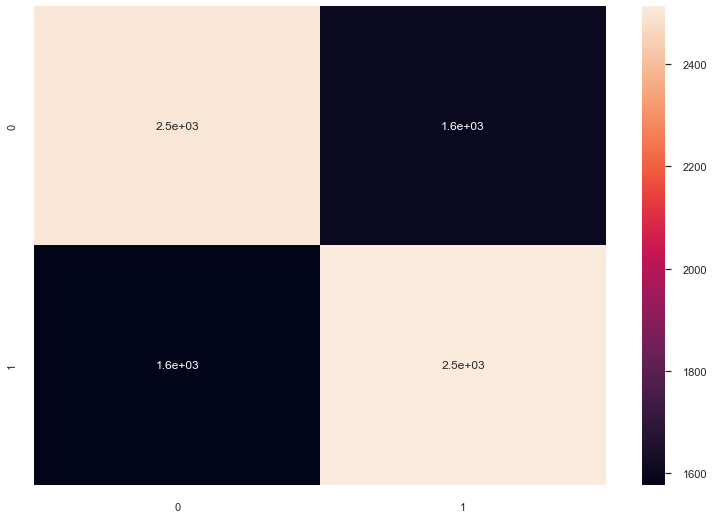

In [50]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
predicted_classes_dt = dt.predict(x_test)
accuracy_dt = accuracy_score(y_test,predicted_classes_dt)
print('Decision Tree Accuracy: ',accuracy_dt)
print('')
cnf_dt = confusion_matrix(y_test, predicted_classes_dt)
sns.heatmap(cnf_dt, annot=True)

Support Vector Machine Accuracy:  0.6776476329917033



<AxesSubplot:>

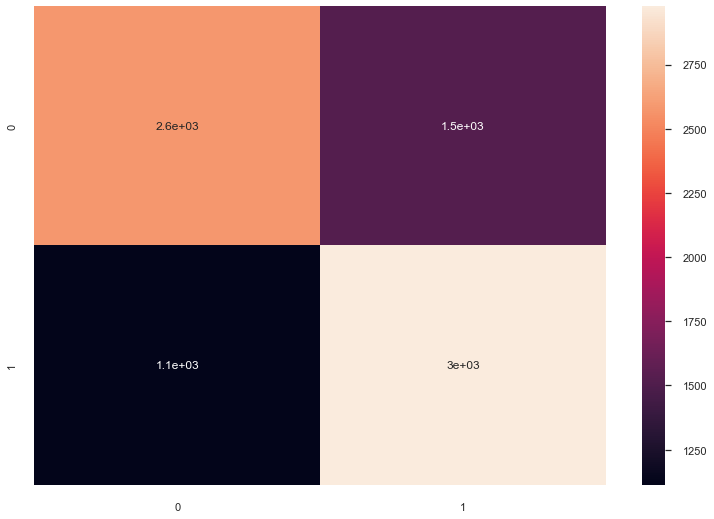

In [51]:
svm = SVC(kernel='linear')
svm.fit(x_train,y_train)
predicted_classes_svm = svm.predict(x_test)
accuracy_svm = accuracy_score(y_test,predicted_classes_svm)
print('Support Vector Machine Accuracy: ',accuracy_svm)
print('')
cnf_svm = confusion_matrix(y_test, predicted_classes_svm)
sns.heatmap(cnf_svm, annot=True)

K Nearest Neighbor Accuracy:  0.6608101512933138



<AxesSubplot:>

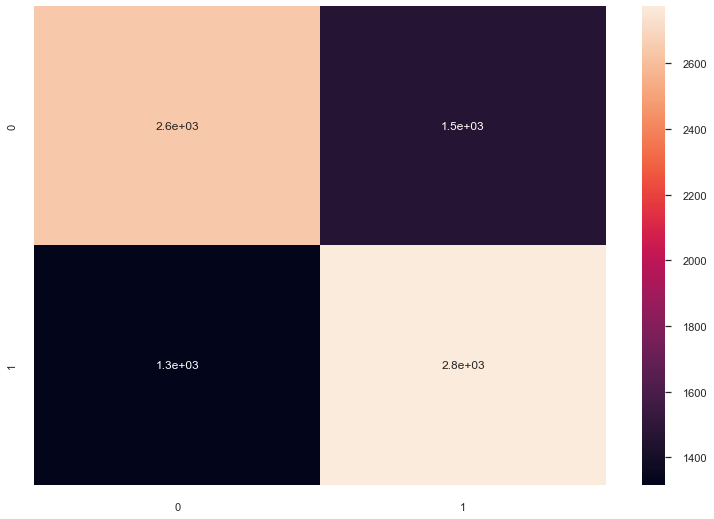

In [52]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
predicted_classes_knn = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test,predicted_classes_knn)
print('K Nearest Neighbor Accuracy: ',accuracy_knn)
print('')
cnf_knn = confusion_matrix(y_test, predicted_classes_knn)
sns.heatmap(cnf_knn, annot=True)

Random Forest Accuracy:  0.6725231820400195



<AxesSubplot:>

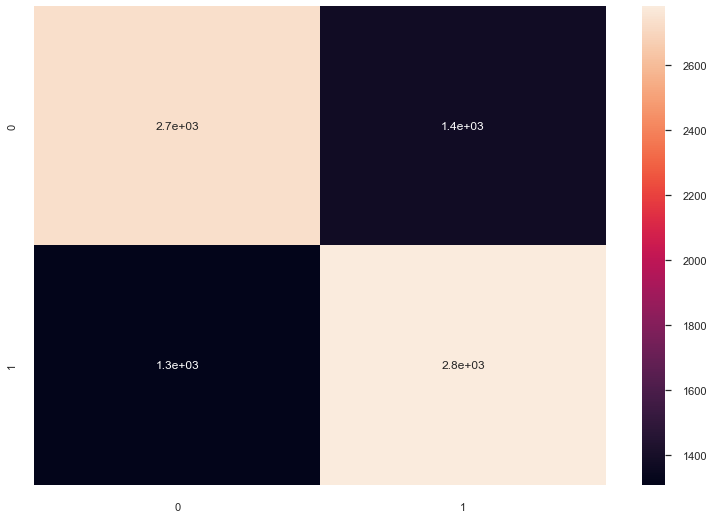

In [53]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
predicted_classes_rfc = rfc.predict(x_test)
accuracy_rfc = accuracy_score(y_test,predicted_classes_rfc)
print('Random Forest Accuracy: ',accuracy_rfc)
print('')
cnf_rfc = confusion_matrix(y_test, predicted_classes_rfc)
sns.heatmap(cnf_rfc, annot=True)

C:\Users\ksp200004\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:03:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Accuracy:  0.6970473401659346



<AxesSubplot:>

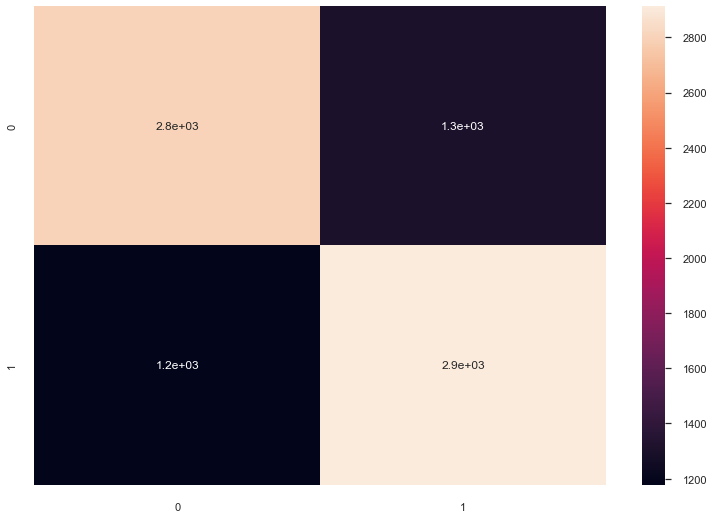

In [54]:
xgbc = XGBClassifier()
xgbc.fit(x_train,y_train)
predicted_classes_xgbc = xgbc.predict(x_test)
accuracy_xgbc = accuracy_score(y_test,predicted_classes_xgbc)
print('XGBoost Accuracy: ',accuracy_xgbc)
print('')
cnf_xgbc = confusion_matrix(y_test, predicted_classes_xgbc)
sns.heatmap(cnf_xgbc, annot=True)

In [58]:
model_data = {'Model':  ['XGBoost', 'Logistic Regression', 'Random Forest', 'Support Vector Machine', 'K Nearest Neighbor', 'Decision Tree'],
        'Accuracy (%)': [accuracy_xgbc*100, accuracy*100, accuracy_rfc*100, accuracy_svm*100, accuracy_knn*100, accuracy_dt*100],}

algo_model_data = pd.DataFrame(model_data)

algo_model_data.sort_values(by=['Accuracy (%)'], ascending=False)

,Model,Accuracy (%)
0,XGBoost,69.704734
3,Support Vector Machine,67.764763
1,Logistic Regression,67.728160
2,Random Forest,67.252318
4,K Nearest Neighbor,66.081015
5,Decision Tree,61.188385


### From the above table, we observe that XGBoost performs best from all the other algorithms. Also, if we perform some more data pre-processing method and getting deep insights about the data, the results might be different form this one. If I would have more time to analyze about the new techniques about getting data insights and incresing model accuracy, would have surely implemented here. 